# Chaines de Markhov

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA


var = pd.read_csv('swaphist.csv', delimiter = ";")

In [2]:
#Calcule la place de l'élément dans un des n groupes
def place(elem,table,freq):
    xmin = min(table)
    xmax = max(table)
    delta = (xmax-xmin)/freq
    return min(int((table[elem]-xmin)/delta),freq-1)

#Calcule la matrice de passage (fréquence de passage d'un groupe à l'autre)
def matrice(table, freq):
    trans = np.zeros((freq,freq))
    n = table.size
    for i in range(0,n-1):
        trans[(place(i,table,freq),place(i+1,table,freq))] = trans[(place(i,table,freq),place(i+1,table,freq))] + 1
    for i in range(0,freq):
        sum_ligne = np.sum(trans[i])
        #if sum_ligne == 0 : sum_ligne = 1
        for j in range(0,freq):
            trans[(i,j)] = trans[(i,j)]/sum_ligne
    #for elmt in trans:
        #elmt = elmt/(np.sum(elmt))
    return trans

#print(matrice(var['1to5'].values,10))

print(matrice(var['1to5'][0:342].values,25))

[[ 0.71428571  0.28571429  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.2         0.4         0.3         0.1         0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.16666667  0.66666667  0.125       0.          0.04166667
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.3125      0.375       0.1875      0.0625      0.
   0.          0.          0.0625      0.          0.      

In [3]:
v1 = np.reshape(matrice(var['1to5'].values,50),50*50)
v2 = np.reshape(matrice(var['10to20'].values,50),50*50)

stats.ks_2samp(v1,v2)

Ks_2sampResult(statistic=0.20120000000000005, pvalue=1.1021463616417465e-44)

In [59]:
var2 = var.drop('Date', 1)
var3 = var2.transpose()
print(var2)

       1to5   1to10  1to20   5to5  5to10  5to20  10to5  10to10  10to20
0     14.50   12.40  12.40  11.90  10.80  10.80   9.60    8.80    8.80
1     13.60   11.60  11.60  10.20   9.00   9.00   9.80    8.90    8.90
2     13.20   11.10  11.10  10.70   9.80   9.80   8.90    8.10    8.10
3     12.70   10.90  10.90  10.90   9.90   9.90   9.10    8.10    8.10
4     12.70   10.80  10.80  10.90   9.90   9.90   9.30    8.30    8.30
5     12.30   10.70  10.70  10.90   9.90   9.90   9.40    8.20    8.20
6     12.10   10.50  10.50  11.00  10.00  10.00   9.50    8.30    8.30
7     12.20   10.40  10.40  10.80   9.80   9.80   9.40    8.10    8.10
8     12.60   10.60  10.60  10.90   9.90   9.90   9.30    8.20    8.20
9     12.50   10.50  10.50  10.90   9.80   9.80   9.40    8.20    8.20
10    13.00   10.90  10.90  11.00   9.90   9.90   9.00    8.10    8.10
11    13.70   11.40  11.40  10.90   9.90   9.90   9.00    8.10    8.10
12    13.00   10.90  10.90  10.80   9.80   9.80   9.00    8.30    8.30
13    

In [62]:
pca = PCA()
pca_bis = PCA()
pca.fit(var2)
pca_bis.fit(var3)
#eigen values table
print(pca.explained_variance_ratio_)
print(pca_bis.explained_variance_ratio_)
#Correlation eigen values dim
first_pc = pca.components_[0]
second_pc = pca.components_[1]
print(first_pc, second_pc)
first_pc_bis = pca_bis.components_[0]
second_pc_bis = pca_bis.components_[1]
print(first_pc_bis, second_pc_bis)

[  9.35057736e-01   5.31911115e-02   7.28881252e-03   2.73506351e-03
   1.22855862e-03   3.05762096e-04   1.00443803e-04   5.77660484e-05
   3.47461334e-05]
[  9.34610516e-01   3.86889889e-02   1.84476061e-02   6.45458859e-03
   1.04489510e-03   3.76636319e-04   2.45689421e-04   1.31079514e-04
   1.52858467e-31]
[ 0.62964598  0.36918005  0.29384376  0.30022305  0.26614204  0.24402612
  0.22998187  0.23779233  0.22573615] [ 0.7645548  -0.15774723 -0.25558292 -0.20618669 -0.24050061 -0.24019857
 -0.24348629 -0.25055235 -0.21245765]
[-0.00742577 -0.00676554 -0.00661064 -0.00573312 -0.00548711 -0.00494067
 -0.0044505  -0.00485593 -0.00537379 -0.00522082 -0.00618556 -0.00728635
 -0.00609465 -0.00636032 -0.00690698 -0.00691523 -0.00707358 -0.00702433
 -0.0068458  -0.00637553 -0.00697485 -0.00611009 -0.00596257 -0.00617868
 -0.00614919 -0.00645102 -0.00715026 -0.00809064 -0.00709477 -0.00810746
 -0.00802257 -0.0081237  -0.00899146 -0.00921375 -0.00909955 -0.00799041
 -0.00749335 -0.00744008 -

[ -5.44388749e+02   3.98067144e+01  -1.28108368e+01  -3.05749448e+00
  -1.45054699e+00   5.60028819e-02   8.75929478e-02   4.58926129e-02
   8.70414851e-14] 0


IndexError: invalid index to scalar variable.

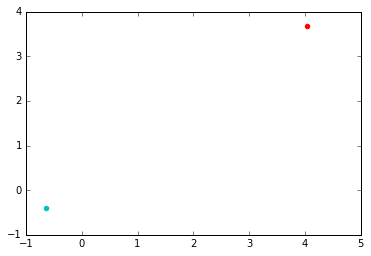

In [58]:
'''transformed = pca.transform(var2)
for i, j in zip(transformed, var2):
    print(i,j)
    plt.scatter(first_pc[0]*i[0],first_pc[1]*i[0], color = "r")
    plt.scatter(second_pc[0]*i[1],second_pc[1]*i[1], color = "c")
    plt.scatter(j[0],j[1],color="b")
    #if isinstance(j[0],float) :
        #plt.scatter(j[0],j[1],color="b")
plt.xlabel("")
plt.show()'''